In [3]:
from utils.data_utils import split_and_organize_dataset
import os
import json
import matplotlib.pyplot as plt

In [4]:
# train_dir, test_dir = split_and_organize_dataset(
#     src_dir="../data/test",
#     dest_dir="../data/test",
#     test_size=0.3
# )

In [5]:
with open('../submission.json') as f:
    submission = json.load(f)
submission

[{'filename': '14909116883_b83473b6ce_o.jpg',
  'label': 'Clams',
  'samples': ['data/test/gallery/Puffers/Puffers (1).jpg',
   'data/test/gallery/Eel/4083681845_e458c9677b_o.jpg',
   'data/test/gallery/Turtle_Tortoise/Turtle_Tortoise (1376).jpg',
   'data/test/gallery/Squid/14529374738_899db16c53_o.jpg',
   'data/test/gallery/Crabs/3280274000_ecf41df23d_o.jpg',
   'data/test/gallery/Clams/34643040874_9bc19bb62d_b.jpg',
   'data/test/gallery/Nudibranchs/5395090964_a9b3c61b84_o.jpg',
   'data/test/gallery/Clams/35097635940_ac7b647fb6_b.jpg',
   'data/test/gallery/Shrimp/3718380712_ee39aeb004_b.jpg',
   'data/test/gallery/Turtle_Tortoise/Turtle_Tortoise (1752).jpg']},
 {'filename': '12313128925_0c060f3c4c_o.jpg',
  'label': 'Clams',
  'samples': ['data/test/gallery/Octopus/2105528764_75f9e6acfb_b.jpg',
   'data/test/gallery/Lobster/14625701223_c4ba249a2d_o.jpg',
   'data/test/gallery/Clams/24792204263_49520f990d_b.jpg',
   'data/test/gallery/Octopus/43833369031_b3b7017913_b.jpg',
   'dat

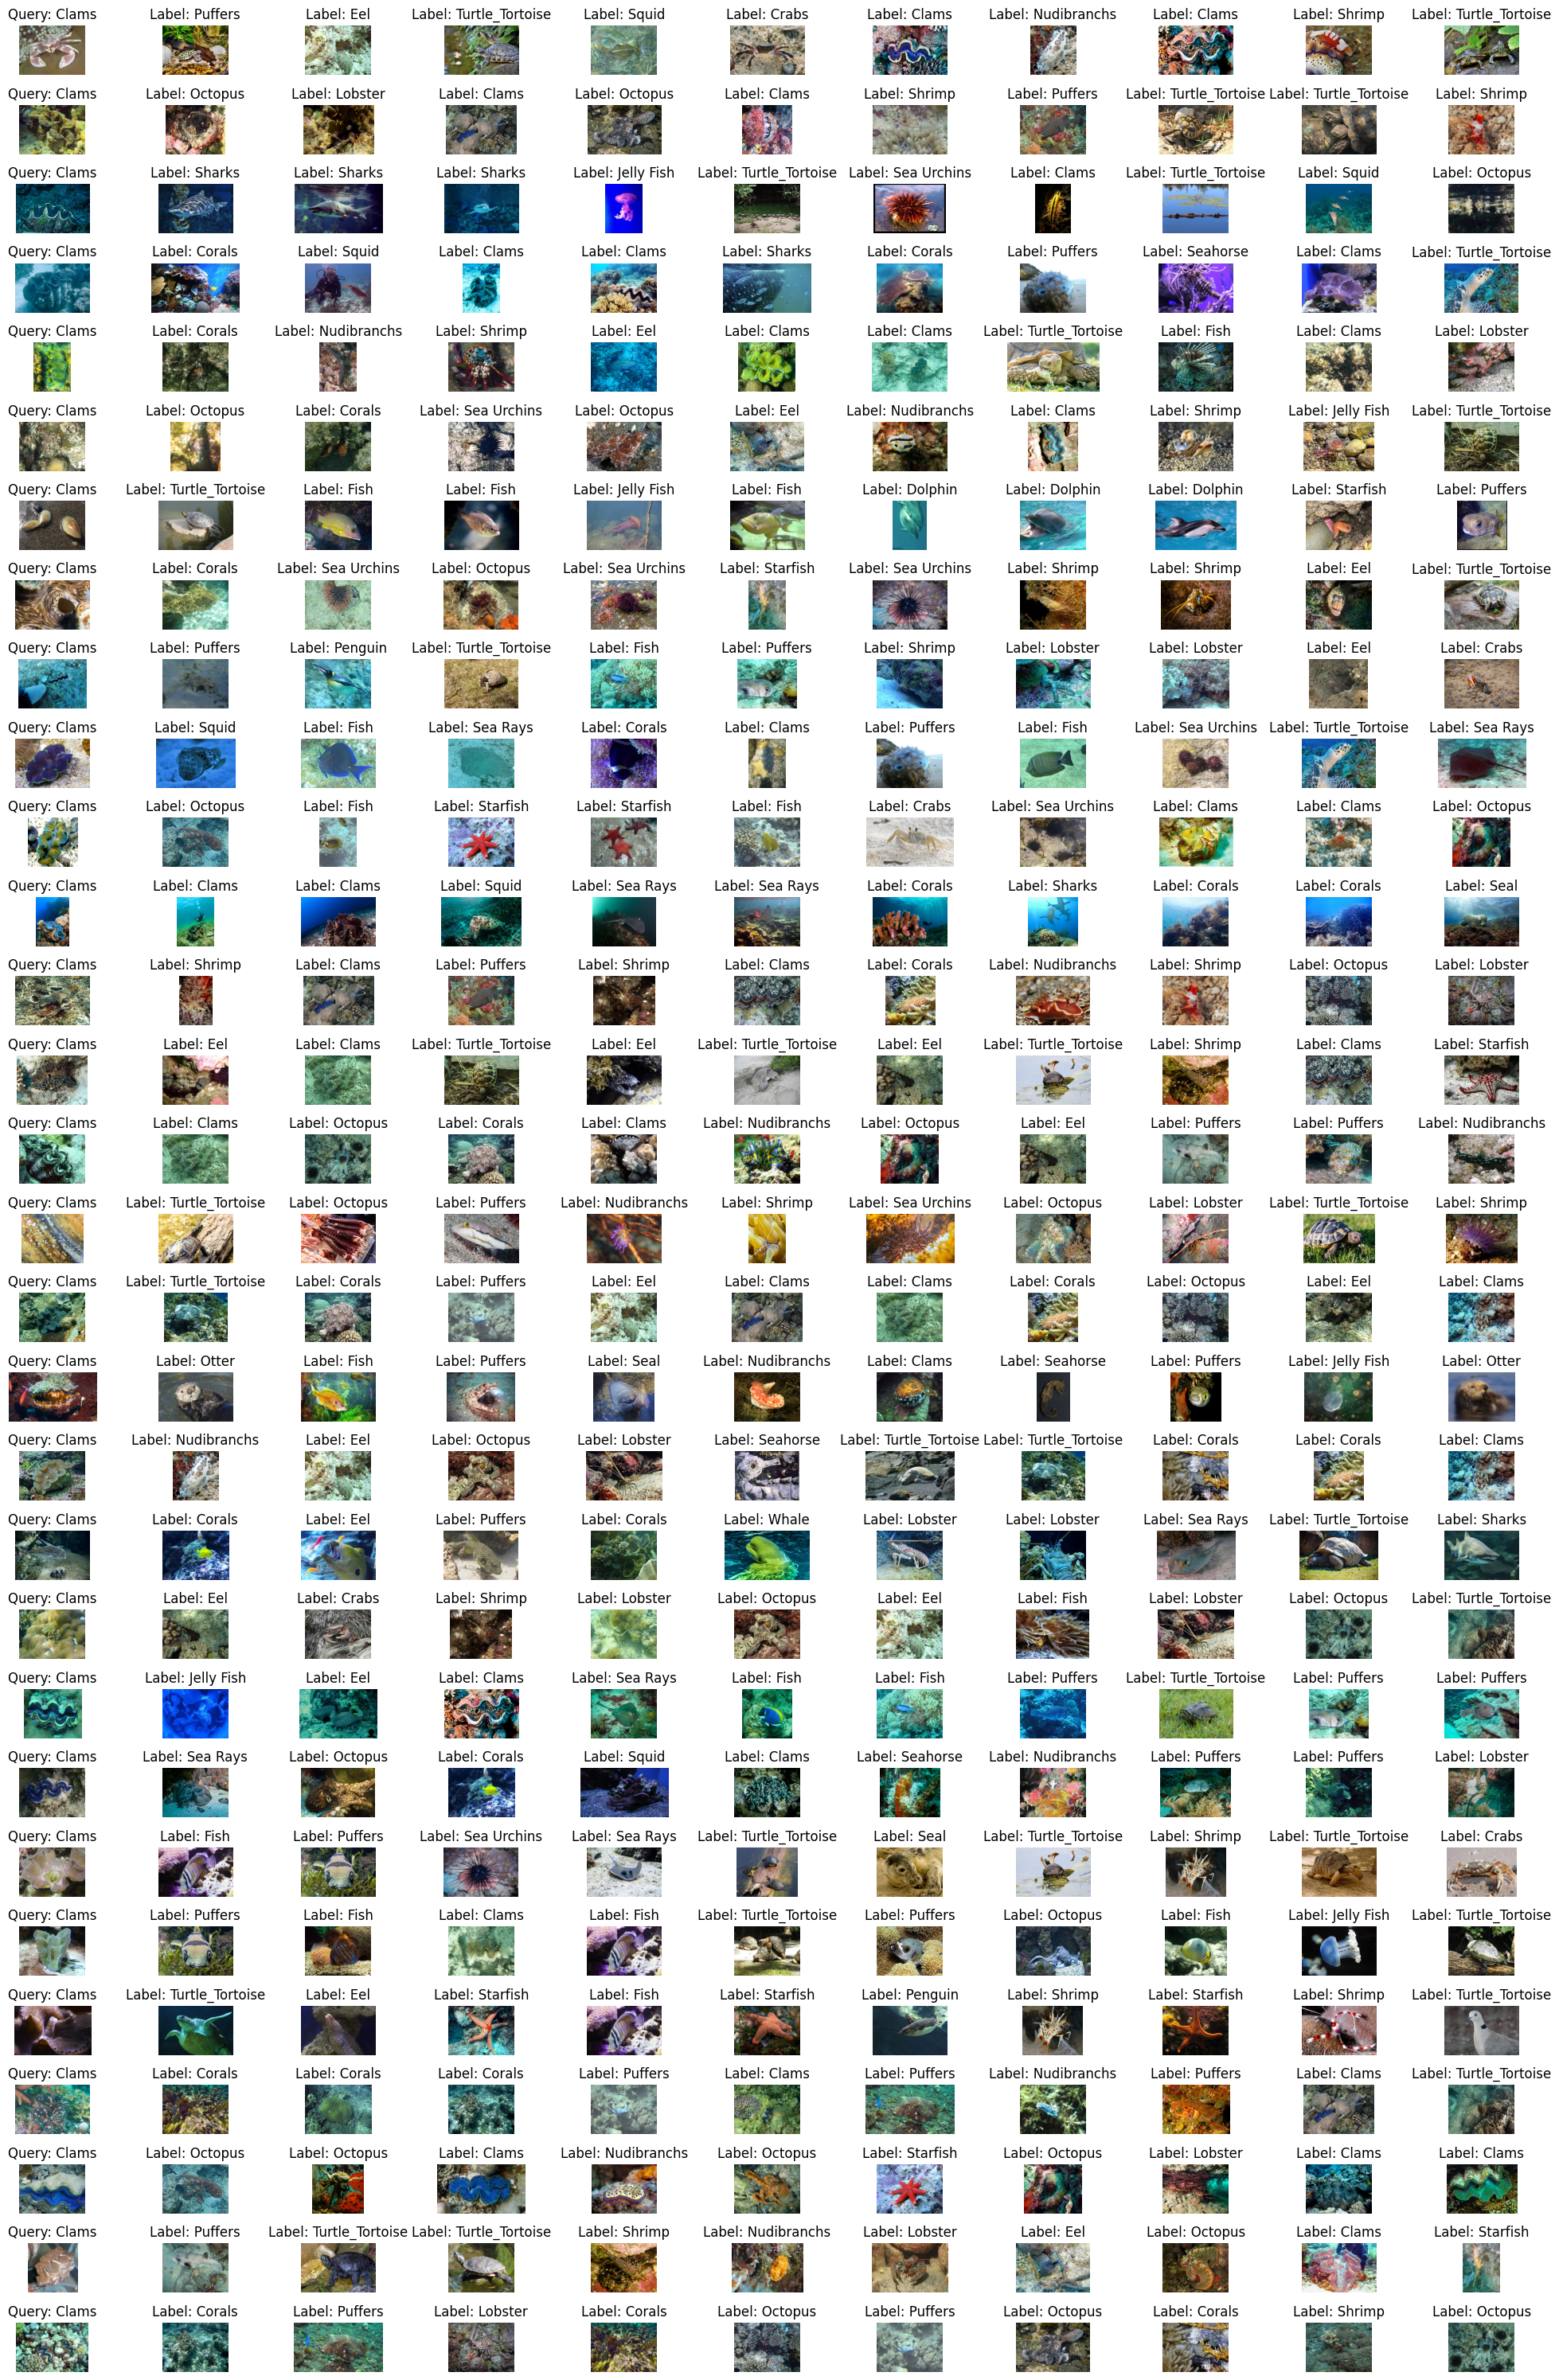

In [6]:
fig, axes = plt.subplots(len(submission[:30]), 11, figsize=(20, len(submission[:30])))
axes[0, 0].set_title('Query Image')
for i, item in enumerate(submission[:30]):
    axes[i, 0].imshow(plt.imread(os.path.join(f'../data/test/query/{item['label']}', item['filename'])))
    label = item['label']
    # display it in the image boottom
    axes[i, 0].set_title(f'Query: {label}')
    axes[i, 0].axis('off')
    for j, match in enumerate(item['samples']):
        label = match.split('/')[-2]
        axes[i, j + 1].set_title(f'Label: {label}')
        axes[i, j + 1].imshow(plt.imread(os.path.join(f'../', match)))
        # axes[0, j + 1].set_title(f'Match {j + 1}')
        axes[i, j + 1].axis('off')
plt.tight_layout()
plt.show()

In [7]:
# calculate top-5 accuracy
def calculate_top_5_accuracy(submission, top_k=5):
    correct = 0
    for item in submission:
        if item['label'] in [match.split('/')[-2] for match in item['samples'][:top_k]]:
            correct += 1
    return correct / len(submission) * 100

top_5_accuracy = calculate_top_5_accuracy(submission, top_k=5)
print(f'Top-5 Accuracy: {top_5_accuracy:.2f}%')

Top-5 Accuracy: 54.62%
